# Original File
# DO NOT EDIT
### Execution stepsYou have different tasks to finish within the day. 7 am is the earliest time and 10 pm is the latest time of the day
to finish all the tasks. Since each time block is 30', there are (15 hours)*(2 blocks/hour)= 30 blocks. Each task
takes different amount of time to complete and different important score. Given that there are scheduled meetings
during the day that you cannot assign the tasks.  How do you assign the tasks to maximize the productivity?
Note: Since there is limited time per day, you don't need to assign every task in one day, the goal is not to fit
every task but to maximize the total score

In [24]:
import logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='mylog.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)
# TODO on .py conversion this first cell goes under "if __name__ == '__main__':" then /n and before main() is called

In [25]:
!pip3 install black[d]
!pip3 install pandas
!pip3 install pulp
!pip3 install tox
!pip3 install matplotlib
!pip3 install openpyxl
# TODO these would move into the requirements.txt file then setup

In [26]:
import pandas as pd
import blackd
import pulp
import tox
import matplotlib
import openpyxl

In [27]:
task_file = '~/sbox/PyCharmProjects/Task-scheduler-problem/old_code/Andrew_Tasks.csv'
tasks = pd.read_csv(task_file)
tasks

,Task name,Important score (1-5),Time to finish,Num of blocks
0,README.md data flow for ALL DATA,1,60,2
1,Complete Mastery of Large Datasets,1,180,6
2,Triage next 5 books,2,120,4
3,Laundry-r,3,60,2
4,11am email brk 3pm email brk,3,30,1
5,dual processor tools,3,60,2
6,Weekend todo list drill induction etc,4,30,1
7,TAM Analysis start,4,120,4
8,visualize my why photo ideal day etc,5,150,5
9,MasterGoal xlsx import sample,5,90,3


In [28]:
schedule = pd.read_csv('schedule.csv')['Availability']
schedule

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    0
15    0
16    0
17    1
18    0
19    0
20    0
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    0
36    1
37    0
38    1
39    1
40    1
41    1
42    0
43    0
44    0
45    0
46    0
47    0
Name: Availability, dtype: int64

# Input parameters:

$s_i$: important score of task $i$

$d_i$: number of time blocks needed to finish task $i$

$b_t$: availability of time block \; $b \in \{0,1\}  $

$B$: total number of time blocks

$n$: total number of tasks

In [29]:
s = list(tasks['Important score (1-5)'])

d = list(tasks['Num of blocks'])

b = list(schedule)
s,d,b

([1, 1, 2, 3, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5],
 [2, 6, 4, 2, 1, 2, 1, 4, 5, 3, 2, 1, 1, 4, 2],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0])

In [30]:
B = len(b)
n = len(s)

In [31]:
#Time blocks available
A = sum(b)

In [32]:
from pulp import *

$\text{Maximize} \;\; \sum_{i=1}^{n}\sum_{t=1}^{B} s_{i}y_{it}$

In [33]:
prob = LpProblem("Schedule_Tasks",LpMaximize)

.md Decision variables:

Whether or not to assign the task in a specific block of time

$y_{it}$ = 1 if task $i$ is assigned to time $t$, 0 otherwise
$$

In [34]:
#Define variable
y = LpVariable.dicts('Block', [(i,t) for i in range(n) for t in range(B)],
                    cat='Binary')

In [35]:
#Define objective
prob += lpSum(s[i]*b[t]*y[(i,t)] for i in range(n) for t in range(B))

# Constraints:

Sum of the time blocks of the assigned tasks should be not greater than the number of available time blocks

$\sum_{i=1}^{n}\sum_{t=1}^{B} y_{it} \leq A$ (1)

Total number of time blocks assigned for each task should not be greater than the time needed to finish the task

$\sum_{t=1}^{B} y_{it} \leq d_i \;; \forall i = 1, 2, ..., n$ (2)

No more than one task each block

$\sum_{i=1}^{n} y_{it} \leq 1 \;; \forall t = 1, 2, ..., B$ (3)

In [36]:
prob += lpSum(y[(i,t)] for i in range(n) for t in range(B)) <= A #1

for i in range(n):
    prob += lpSum(y[(i,t)] for t in range(B)) <= d[i] #2

for t in range(B):
    prob += lpSum(y[(i,t)] for i in range(n)) <= 1 #3

In [37]:
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/owner/opt/anaconda3/envs/Task-scheduler-problem/lib/python3.7/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/jq/9dbfmyhn6s98d705yc81nqym0000gn/T/73cb0abd823d42239056c16cd949c93a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/jq/9dbfmyhn6s98d705yc81nqym0000gn/T/73cb0abd823d42239056c16cd949c93a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 69 COLUMNS
At line 4045 RHS
At line 4110 BOUNDS
At line 4831 ENDATA
Problem MODEL has 64 rows, 720 columns and 2160 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 116 - 0.00 seconds
Cgl0004I processed model has 41 rows, 375 columns (375 integer (375 of which binary)) and 1125 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I So

1

In [38]:
import numpy as np


tasks_zero = np.zeros((n,B))
chosen_tasks = []
print("Assignment accomplished!")
for i in range(n):
    for t in range(B):
        tasks_zero[i][t]= y[(i,t)].varValue*(i+1)
        if y[(i,t)].varValue == 1:
            if i+1 not in chosen_tasks:
                chosen_tasks.append(i+1)

print('Chosen tasks are: {}'.format(chosen_tasks))


Assignment accomplished!
Chosen tasks are: [4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15]


# TODO disabled printing, create switch for user option
# tasks_zero

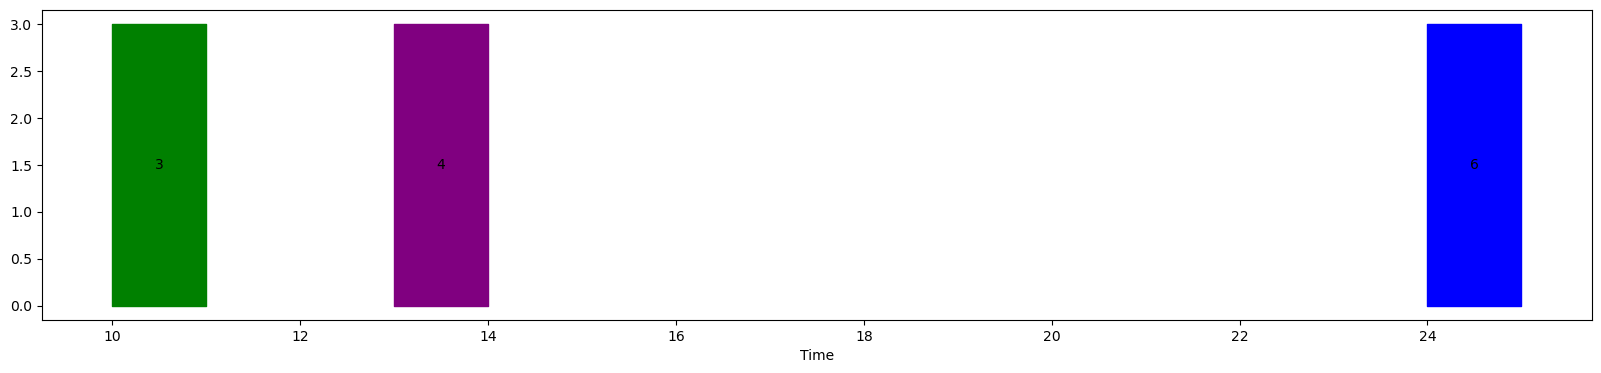

In [39]:
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (20,20))
#1x1 grid, first subplot
ax = fig.add_subplot(111)
#Make the y-axis invisible
ax.axes.get_yaxis().set_visible(True) # default is false
#Set the ratio of y-unit to x-unit
ax.set_aspect(1)


def avg(a, b):
    """

    :param a:
    :param b:
    :return:
    """
    return (a + b) / 2.0

#y is the order of row, row is the data of the rows
for y, row in enumerate(tasks_zero):
    for x, col in enumerate(row):
        x1 = [x, x+1]
        y1 = [0, 0]
        y2 = [3, 3]

        if col == 1:
            #Fill the area between two horizontal curves.
            plt.fill_between(x1, y1, y2=y2, color='red')
            #Fill the text in the middle of 2 units in x and y-axis
            plt.text(avg(x1[0], x1[1]), avg(y1[0],y2[0]), "0",
                    horizontalalignment='center', verticalalignment='center')

        if col == 2 :
            #Fill the area between two horizontal curves.
            plt.fill_between(x1, y1, y2=y2, color='pink')
            #Fill the text in the middle of 2 units in x and y-axis
            plt.text(avg(x1[0], x1[1]), avg(y1[0],y2[0]), "1",
                    horizontalalignment='center', verticalalignment='center')

        if col == 4:
            #Fill the area between two horizontal curves.
            plt.fill_between(x1, y1, y2=y2, color='green')
            #Fill the text in the middle of 2 units in x and y-axis
            plt.text(avg(x1[0], x1[1]), avg(y1[0],y2[0]), "3",
                    horizontalalignment='center', verticalalignment='center')

        if col == 5:
            #Fill the area between two horizontal curves.
            plt.fill_between(x1, y1, y2=y2, color='purple')
            #Fill the text in the middle of 2 units in x and y-axis
            plt.text(avg(x1[0], x1[1]), avg(y1[0],y2[0]), "4",
                    horizontalalignment='center', verticalalignment='center')

        if col == 7:
            #Fill the area between two horizontal curves.
            plt.fill_between(x1, y1, y2=y2, color='blue')
            #Fill the text in the middle of 2 units in x and y-axis
            plt.text(avg(x1[0], x1[1]), avg(y1[0],y2[0]), "6",
                    horizontalalignment='center', verticalalignment='center')


ax.set_xlabel('Time')
plt.show()

In [40]:
pulp.value(prob.objective)

116.0

In [41]:
prob.writeLP('task_problem.lp')

[Block_(0,_0),
 Block_(0,_1),
 Block_(0,_10),
 Block_(0,_11),
 Block_(0,_12),
 Block_(0,_13),
 Block_(0,_14),
 Block_(0,_15),
 Block_(0,_16),
 Block_(0,_17),
 Block_(0,_18),
 Block_(0,_19),
 Block_(0,_2),
 Block_(0,_20),
 Block_(0,_21),
 Block_(0,_22),
 Block_(0,_23),
 Block_(0,_24),
 Block_(0,_25),
 Block_(0,_26),
 Block_(0,_27),
 Block_(0,_28),
 Block_(0,_29),
 Block_(0,_3),
 Block_(0,_30),
 Block_(0,_31),
 Block_(0,_32),
 Block_(0,_33),
 Block_(0,_34),
 Block_(0,_35),
 Block_(0,_36),
 Block_(0,_37),
 Block_(0,_38),
 Block_(0,_39),
 Block_(0,_4),
 Block_(0,_40),
 Block_(0,_41),
 Block_(0,_42),
 Block_(0,_43),
 Block_(0,_44),
 Block_(0,_45),
 Block_(0,_46),
 Block_(0,_47),
 Block_(0,_5),
 Block_(0,_6),
 Block_(0,_7),
 Block_(0,_8),
 Block_(0,_9),
 Block_(1,_0),
 Block_(1,_1),
 Block_(1,_10),
 Block_(1,_11),
 Block_(1,_12),
 Block_(1,_13),
 Block_(1,_14),
 Block_(1,_15),
 Block_(1,_16),
 Block_(1,_17),
 Block_(1,_18),
 Block_(1,_19),
 Block_(1,_2),
 Block_(1,_20),
 Block_(1,_21),
 Bloc

In [51]:
type(chosen_tasks)
chosen_tasks_dataframe = pd.read_csv(task_file)
# chosen_tasks_dataframe.sort_index([chosen_tasks])
df_chosen_tasks = chosen_tasks_dataframe.set_index(0)

KeyError: 'None of [0] are in the columns'

In [43]:
tasks = pd.read_csv(task_file)
tasks

,Task name,Important score (1-5),Time to finish,Num of blocks
0,README.md data flow for ALL DATA,1,60,2
1,Complete Mastery of Large Datasets,1,180,6
2,Triage next 5 books,2,120,4
3,Laundry-r,3,60,2
4,11am email brk 3pm email brk,3,30,1
5,dual processor tools,3,60,2
6,Weekend todo list drill induction etc,4,30,1
7,TAM Analysis start,4,120,4
8,visualize my why photo ideal day etc,5,150,5
9,MasterGoal xlsx import sample,5,90,3


In [44]:
print("next\n")
type(chosen_tasks)

next



list

In [45]:
printed_chosen_tasks = chosen_tasks[0]
printed_chosen_tasks


4